In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.core.display import HTML

##Choose appropiate Color palette

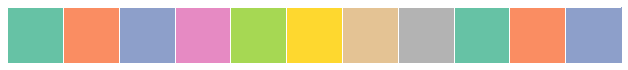

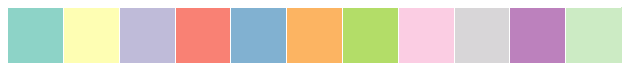

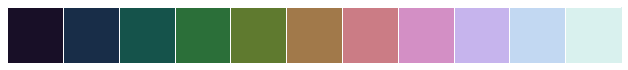

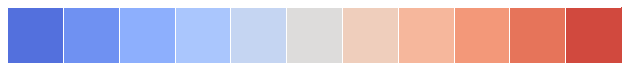

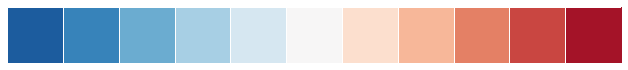

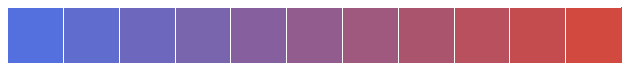

In [4]:
#Test out different color palettes
sns.palplot(sns.color_palette("Set2", 11))
sns.palplot(sns.color_palette("Set3", 11))
sns.palplot(sns.color_palette("cubehelix", 11))
sns.palplot(sns.color_palette("coolwarm", 11))
sns.palplot(sns.color_palette("RdBu_r", 11))
sns.palplot(sns.blend_palette(["#5470de", "#d1493f"], 11))

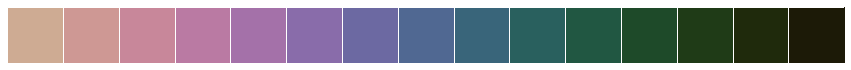

In [5]:
sns.palplot(sns.cubehelix_palette(15, start=1., rot=1.5, dark=0.1, light=.7, reverse=False))

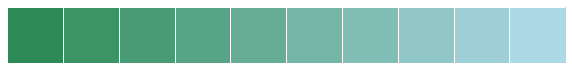

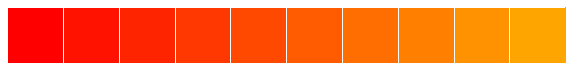

In [6]:
sns.palplot(sns.blend_palette(["seagreen", "lightblue"], 10));
sns.palplot(sns.blend_palette(["red", "orange"], 10));
pal7 = sns.blend_palette(["seagreen", "lightblue"], 11)
pal8 = sns.blend_palette(["red", "orange"], 11)

In [7]:
#save them for use in function
pal1 = sns.color_palette('Set2', 11)
pal2 = sns.cubehelix_palette(11, start=0, rot=3, dark=0.3, light=.7, reverse=True)
pal3 = sns.color_palette("coolwarm", 11)
pal4 = sns.cubehelix_palette(11, start=1., rot=1.5, dark=0.1, light=.7, reverse=False)
pal5 = sns.color_palette("RdBu_r", 11)
pal6 = sns.blend_palette(["#5470de", "#d1493f"], 11)

In [8]:
pal3.as_hex()

[u'#5470de',
 u'#6f92f3',
 u'#8db0fe',
 u'#aac7fd',
 u'#c5d6f2',
 u'#dddcdc',
 u'#efcebd',
 u'#f7b89c',
 u'#f4987a',
 u'#e7745b',
 u'#d1493f']

##Generate the colored parentheses

In [9]:
teststring = "((()(()())(((((((())))))))))"

In [10]:
def parse_paren(some_string, some_palette):
    color_codes = {i:v for i,v in enumerate(some_palette.as_hex())}
    html_parse = '<div style="font-size:18pt; line-height: 24px">'
    depth = 0
    for c in some_string:
        if c == "(" or c == "[":
            #print " "*depth,"("
            html_parse += '<span style="color:{0};">{1}</span>'.format(color_codes[depth], c)
            depth+=1
            
        else:
            depth-=1
            html_parse += '<span style="color:{0};">{1}</span>'.format(color_codes[depth], c)

            #print " "*depth,")"
    html_parse += "</div>"
    return HTML(html_parse)

parse_paren(teststring, pal5)

##Read Language

In [11]:
with open("dyck-0.9-test.txt", "r") as text_file:
    lines = text_file.read()
parse_paren(lines, pal5)

##Generate Sized Parentheses

In [12]:
def parse_paren_size(some_string, some_palette):
    color_codes = {i:v for i,v in enumerate(some_palette.as_hex())}
    html_parse = '<div style="line-height: 30px">'
    depth = 0
    for c in some_string:
        if c == "(" or c == "[":
            html_parse += '<span style="color:{0};font-size:{1}pt">{2}</span>'.format(color_codes[depth], 30-2*depth, c)
            depth+=1
        else:
            depth-=1
            html_parse += '<span style="color:{0};font-size:{1}pt">{2}</span>'.format(color_codes[depth], 30-2*depth, c)

    html_parse += "</div>"
    return HTML(html_parse)

In [13]:
parse_paren_size(teststring, pal2)

##Line Plot for Depth

In [21]:
def parse_paren_depth(some_string):
    depth = 0
    depths = []
    for c in some_string:
        if c == "(" or c == "[":
            depth+=1   
            depths.append(depth)
        else:
            depth-=1    
        
    return depths

In [ ]:
with open("dyck6-depth-8.txt", "r") as text_file:
    lines2 = text_file.read()

In [ ]:
depth_array = parse_paren_depth(lines2)
counts = np.log(np.bincount(depth_array))

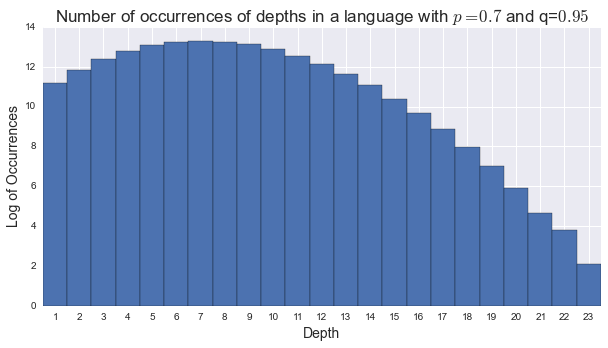

In [42]:
#plt.plot(depth_array, color=pal2.as_hex()[6], alpha=.9)
#plt.show()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(xrange(len(counts)), counts, width=1, align='center')
ax.set(xticks=range(28), xlim=[.5, 23.5])
plt.xlabel("Depth", fontsize=14)
plt.ylabel("Log of Occurrences", fontsize=14)
plt.title("Number of occurrences of depths in a language with $p=0.7$ and q=$0.95$", fontsize=17)
plt.show()

In [18]:

def parse_depency_range(some_string):
    depth = 0
    ranges_count = {l+1:[] for l in xrange(11)}
    ranges = []
    depths = []  
    opposites = {"(":")", "[":"]", "{":"}"}
    for c in some_string:
        if c == "(" or c == "[":
            depth+=1   
            depths.append(c)
            ranges.append(0)
            ranges = [x+1 for x in ranges]
        elif c == opposites[depths[-1]]:
            depths.pop()
            curr_range = ranges.pop()
            try:
                ranges_count[len(depths)+1].append(curr_range)
            except:
                ranges_count[len(depths)+1] = [curr_range]
            ranges = [x+1 for x in ranges]

            depth-=1    
    for i, v in ranges_count.iteritems():
        print "For Depth {0}, average dependency length is {1:.4g} with std {2:.4g} in {3} occurrences".format(i, np.mean(v), np.std(v), len(v))
    
    return ranges_count
dep_lengths = parse_depency_range(lines2)

For Depth 1, average dependency length is 130.5 with std 232.5 in 70404 occurrences
For Depth 2, average dependency length is 64.37 with std 121.4 in 139442 occurrences
For Depth 3, average dependency length is 35.82 with std 70.16 in 239991 occurrences
For Depth 4, average dependency length is 22.23 with std 44.32 in 359764 occurrences
For Depth 5, average dependency length is 14.97 with std 29.86 in 478265 occurrences
For Depth 6, average dependency length is 10.78 with std 21.19 in 567098 occurrences
For Depth 7, average dependency length is 8.228 with std 15.73 in 601043 occurrences
For Depth 8, average dependency length is 6.557 with std 12.09 in 574812 occurrences
For Depth 9, average dependency length is 5.418 with std 9.645 in 497759 occurrences
For Depth 10, average dependency length is 4.599 with std 7.847 in 392749 occurrences
For Depth 11, average dependency length is 3.986 with std 6.543 in 283512 occurrences
For Depth 12, average dependency length is 3.526 with std 5.553 

In [57]:
x_v = np.linspace(1,24,24)
l_v = []
st_v = []
for i, v in dep_lengths.iteritems():
    l_v.append(np.log(np.mean(v)))
    st_v.append(np.log(np.std(v)))
    

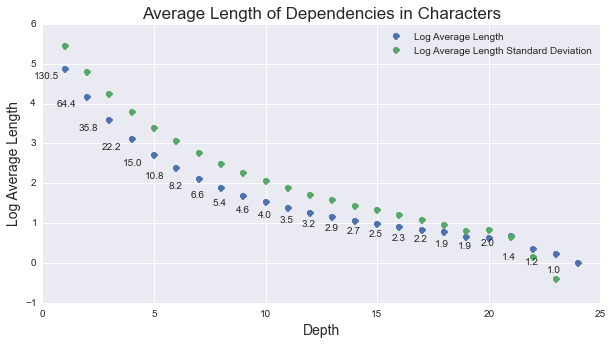

In [89]:
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(x_v, l_v, 'o', label="Log Average Length")
plt.plot(x_v, st_v, 'o', label="Log Average Length Standard Deviation")
# for xy in zip(x_v, l_v):                                                # <--
#     ax.annotate('(%f, %f)' % xy, xy=xy, textcoords='offset points') 
for i,j in zip(x_v,l_v):
    ax.annotate('%.1f' %np.exp(j), xy=(i,j), xytext=(-30,-10), textcoords='offset points')
plt.legend()
plt.xlabel("Depth", fontsize=14)
plt.ylabel("Log Average Length", fontsize=14)
plt.title("Average Length of Dependencies in Characters", fontsize=17)
plt.show()

##Visualize Dyck2

In [70]:
with open("dyck2-0.9-test.txt", "r") as text_file:
    lines3 = text_file.read()

In [78]:
parse_paren(lines3, pal5)

In [91]:
def parse_two_paren(some_string, some_palette, second_palette):
    color_codes = {i:v for i,v in enumerate(some_palette.as_hex())}
    color_codes2 = {i:v for i,v in enumerate(second_palette.as_hex())}
    html_parse = '<div style="font-size:18pt; line-height: 24px">'
    depth = 0
    for c in some_string:
        if c == "(" or c == "[":
            #print " "*depth,"("
            curr_col = color_codes[depth]
            if c == "[":
                curr_col = color_codes2[depth]
            html_parse += '<span style="color:{0};">{1}</span>'.format(curr_col, c)
            depth+=1
            
        else:
            depth-=1
            curr_col = color_codes[depth]
            if c == "]":
                curr_col = color_codes2[depth]
            html_parse += '<span style="color:{0};">{1}</span>'.format(curr_col, c)

            #print " "*depth,")"
    html_parse += "</div>"
    return HTML(html_parse)

In [105]:
parse_two_paren(lines3, pal7, pal8)

In [ ]:
#offset language height parameter